     Manufacturer_Code  Price_in_thousands
0                    1               21.50
1                    1               28.40
2                    1                 NaN
3                    1               42.00
4                    2               23.99
..                 ...                 ...
150                 29               15.90
151                 30               23.40
152                 30               24.40
153                 30               27.50
154                 30               28.80

[85 rows x 2 columns]


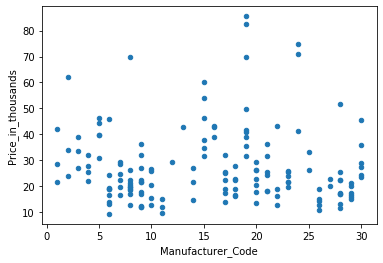

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
cars = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/CarSalesPredict_LinearRegression/master/Car_sales.csv')

In [0]:
%matplotlib inline
import numpy as np

In [4]:
cars.head()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
cars.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [0]:
manufacturer = tf.feature_column.numeric_column('Manufacturer')
model = tf.feature_column.numeric_column('Model')
sales_k = tf.feature_column.numeric_column('Sales_in_thousands')
year_resale = tf.feature_column.numeric_column('Vehicle_type')
vehicle_type = tf.feature_column.numeric_column('Price_in_thousands')
engine_size = tf.feature_column.numeric_column('Engine_size')
horsepower = tf.feature_column.numeric_column('Horsepower')
fuel_efficiency = tf.feature_column.numeric_column('Fuel_efficiency')
latest_launch = tf.feature_column.numeric_column('Latest_Launch')
power_perf_factor = tf.feature_column.numeric_column('Power_perf_factor')

In [0]:
df = pd.DataFrame(cars)

In [8]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [9]:
cars.describe

<bound method NDFrame.describe of     Manufacturer    Model  ...  Latest_Launch  Power_perf_factor
0          Acura  Integra  ...       2/2/2012          58.280150
1          Acura       TL  ...       6/3/2011          91.370778
2          Acura       CL  ...       1/4/2012                NaN
3          Acura       RL  ...      3/10/2011          91.389779
4           Audi       A4  ...      10/8/2011          62.777639
..           ...      ...  ...            ...                ...
152        Volvo      V40  ...      9/21/2011          66.498812
153        Volvo      S70  ...     11/24/2012          70.654495
154        Volvo      V70  ...      6/25/2011          71.155978
155        Volvo      C70  ...      4/26/2011         101.623357
156        Volvo      S80  ...     11/14/2011          85.735655

[157 rows x 16 columns]>

     Horsepower  Price_in_thousands
0         140.0               21.50
1         225.0               28.40
2         225.0                 NaN
3         210.0               42.00
4         150.0               23.99
..          ...                 ...
152       160.0               24.40
153       168.0               27.50
154       168.0               28.80
155       236.0               45.50
156       201.0               36.00

[143 rows x 2 columns]


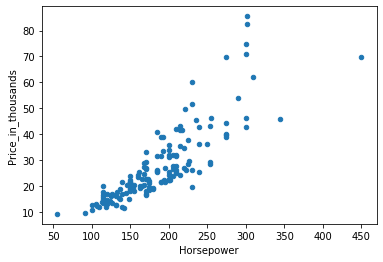

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df[['Horsepower','Price_in_thousands']]
bins = np.arange(0,1000)
groups = df1.groupby(pd.cut(cars['Horsepower'],bins))
print(groups.head())
groups['Price_in_thousands'].plot.line
df1.plot(x = 'Horsepower', y = 'Price_in_thousands', kind = 'scatter')

Some feature engineering has been added to this: there is a relationship between horsepower and price; a relationship between vehicle manufacturer and price will be charted. The following vehicle manufacturer codes apply: 
1 - Acura
2 - Audi
3 - BMW
4 - Buick
5 - Cadillac
6 - Chevrolet
7 - Chrysler
8 - Dodge
9 - Ford
10 - Honda
11 - Hyundai
12 - Infiniti
13 - Jaguar
14 - Jeep 
15 - Lexus
16 - Lincoln
17 - Mitsubishi
18 - Mercury
19 - Mercedes - B
20 - Nissan
21 - Oldsmobile
22 - Plymouth
23 - Pontiac
24 - Porsche
25 - Saab
26 - Saturn
27 - Subaru
28 - Toyota
29 - Volkswagen
30 - Volvo

In [0]:
cars2 = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/CarSalesPredict_LinearRegression/master/Car_sales%20-%20Car_sales%20(1).csv')

In [12]:
cars2.columns

Index(['Manufacturer_Code', 'Manufacturer', 'Model', 'Sales_in_thousands',
       '__year_resale_value', 'Vehicle_type', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor'],
      dtype='object')

In [0]:
manufacturer_code = tf.feature_column.numeric_column('Manufacturer_Code ')
manufacturer = tf.feature_column.numeric_column('Manufacturer')
model = tf.feature_column.numeric_column('Model')
sales_k = tf.feature_column.numeric_column('Sales_in_thousands')
year_resale = tf.feature_column.numeric_column('Vehicle_type')
vehicle_type = tf.feature_column.numeric_column('Price_in_thousands')
engine_size = tf.feature_column.numeric_column('Engine_size')
horsepower = tf.feature_column.numeric_column('Horsepower')
fuel_efficiency = tf.feature_column.numeric_column('Fuel_efficiency')
latest_launch = tf.feature_column.numeric_column('Latest_Launch')
power_perf_factor = tf.feature_column.numeric_column('Power_perf_factor')
resale_oneyr = tf.feature_column.numeric_column('__year_resale_value')

     Manufacturer_Code  Price_in_thousands
0                    1               21.50
1                    1               28.40
2                    1                 NaN
3                    1               42.00
4                    2               23.99
..                 ...                 ...
152                 30               24.40
153                 30               27.50
154                 30               28.80
155                 30               45.50
156                 30               36.00

[128 rows x 2 columns]


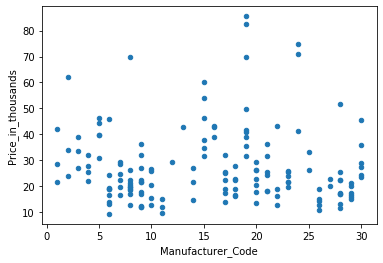

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
df2 = cars2[['Manufacturer_Code','Price_in_thousands']]
bins = np.arange(0,1000)
groups = df2.groupby(pd.cut(cars['Price_in_thousands'],bins))
print(groups.head())
groups['Price_in_thousands'].plot.line
df2.plot(x = 'Manufacturer_Code', y = 'Price_in_thousands', kind = 'scatter')

     Manufacturer_Code  Horsepower
0                    1       140.0
1                    1       225.0
2                    1       225.0
3                    1       210.0
4                    2       150.0
..                 ...         ...
152                 30       160.0
153                 30       168.0
154                 30       168.0
155                 30       236.0
156                 30       201.0

[143 rows x 2 columns]


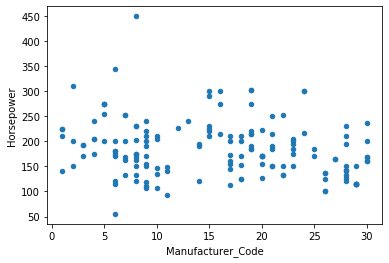

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
df3 = cars2[['Manufacturer_Code','Horsepower']]
bins = np.arange(0,1000)
groups = df3.groupby(pd.cut(cars['Horsepower'],bins))
print(groups.head())
groups['Horsepower'].plot.line
df3.plot(x = 'Manufacturer_Code', y = 'Horsepower', kind = 'scatter')

In [0]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = cars2[['Manufacturer_Code', 'Price_in_thousands', 'Horsepower', '__year_resale_value']] 
y = cars2['Price_in_thousands']

In [17]:
X[['Manufacturer_Code', 'Price_in_thousands', 'Horsepower', '__year_resale_value']] = scale.fit_transform(X[['Manufacturer_Code', 'Price_in_thousands', 'Horsepower', '__year_resale_value']].as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
print (X)

     Manufacturer_Code  Price_in_thousands  Horsepower  __year_resale_value
0            -1.695741           -0.411789   -0.812988            -0.150182
1            -1.695741            0.070551    0.690949             0.157990
2            -1.695741                 NaN    0.690949             0.013329
3            -1.695741            1.021248    0.425549             1.021574
4            -1.579126           -0.237727   -0.636055             0.366653
..                 ...                 ...         ...                  ...
152           1.686085           -0.209066   -0.459121                  NaN
153           1.686085            0.007637   -0.317574                  NaN
154           1.686085            0.098512   -0.317574                  NaN
155           1.686085            1.265913    0.885577                  NaN
156           1.686085            0.601823    0.266308                  NaN

[157 rows x 4 columns]


In [19]:
est = sm.OLS(y, X).fit()

est.summary
#model = sm.OLS(y, X)
#results = model.fit()
#results.params



MissingDataError: ignored

So, there is missing data, so data will be further cleaned to ensure processing. 

In [0]:
cars_file = ('https://raw.githubusercontent.com/lannstoirme/CarSalesPredict_LinearRegression/master/Car_sales%20-%20Car_sales%20(1).csv')
def extract_data(cars_file):
    #arrays to hold the labels and features
      labels = []
      fvecs = []

  #iterate over the rows, split the label from the features
  #convert labels to integers and features to floats

      for line in file(cars_file):
          row = line.split(',')
          labels.append(int(row[0]))
          fvecs.append([float(x) for x in row[1:2]])

This YouTube presentation by Siraj Raval is a good demonstration of data preparation: [Siraj Rival Cleaning Data](https://youtu.be/0xVqLJe9_CY)

In [21]:
#creating bool series True for NaN values
bool_series = pd.notnull(cars2["Manufacturer"])
cars2[bool_series]

,Manufacturer_Code,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,1,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,1,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,30,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,30,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,30,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,30,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [22]:
bool_series2 = pd.notnull(cars2["__year_resale_value"])
cars2[bool_series2]

,Manufacturer_Code,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,1,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,1,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,29,Volkswagen,Golf,9.761,11.425,Passenger,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,1/24/2011,46.943877
146,29,Volkswagen,Jetta,83.721,13.240,Passenger,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,8/27/2011,47.638237
147,29,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,29,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372


After determining that multiple fields were missing data; I used the mean of each feature to replace null values; the result is a clean CSV, and can now be pushed into a DataFrame.


In [0]:
cars3 = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/CarSalesPredict_LinearRegression/master/Cars%20Clean%20Data%20-%20Sheet1%20(1).csv')

In [31]:
cars3.head()

,Manufacturer_Code,Engine_Size,Price_in_thousands,Sales_in_thousands,Horsepower,Year_resale_value
0,1,1.8,21.50,16.919,140,16.360
1,1,3.2,28.40,39.384,225,19.875
2,1,3.2,27.40,14.114,225,18.225
3,1,3.5,42.00,8.588,210,29.725
4,2,1.8,23.99,20.397,150,22.255


In [24]:
cars3.describe

<bound method NDFrame.describe of      Manufacturer_Code  Engine_Size  ...  Horsepower  Year_resale_value
0                    1          1.8  ...         140             16.360
1                    1          3.2  ...         225             19.875
2                    1          3.2  ...         225             18.225
3                    1          3.5  ...         210             29.725
4                    2          1.8  ...         150             22.255
..                 ...          ...  ...         ...                ...
152                 30          1.9  ...         160             18.073
153                 30          2.4  ...         168             18.073
154                 30          2.4  ...         168             18.073
155                 30          2.3  ...         236             18.073
156                 30          2.9  ...         201             18.073

[157 rows x 6 columns]>

In [25]:
cars3.columns

Index(['Manufacturer_Code', 'Engine_Size', 'Price_in_thousands',
       'Sales_in_thousands', 'Horsepower', 'Year_resale_value'],
      dtype='object')

In [0]:
manufacturer_code = tf.feature_column.numeric_column('Manufacturer_Code')
engine_size = tf.feature_column.numeric_column('Engine_Size')
price_in_thousands = tf.feature_column.numeric_column('Price_in_thousands')
sales_in_thousands = tf.feature_column.numeric_column('Sales_in_thousands')
horsepower = tf.feature_column.numeric_column('Horsepower')
year_resale_value = tf.feature_column.numeric_column('Year_resale_value')

In [30]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = cars3[['Manufacturer_Code', 'Engine_Size', 'Price_in_thousands',
       'Sales_in_thousands', 'Horsepower']]
y = cars3[['Year_resale_value']]

X[['Manufacturer_Code', 'Engine_Size', 'Price_in_thousands',
       'Sales_in_thousands', 'Horsepower',]] = scale.fit_transform(X[['Manufacturer_Code', 'Engine_Size', 'Price_in_thousands',
       'Sales_in_thousands', 'Horsepower']].as_matrix())

est = sm.OLS(y, X).fit()

est.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Year_resale_value   R-squared (uncentered):                   0.162
Model:                            OLS   Adj. R-squared (uncentered):              0.134
Method:                 Least Squares   F-statistic:                              5.866
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                    5.51e-05
Time:                        09:09:44   Log-Likelihood:                         -684.36
No. Observations:                 157   AIC:                                      1379.
Df Residuals:                     152   BIC:                                      1394.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Manufacturer_Code      0.3987      1.649      0.242      0.809      -2.859       3.656
Engine_Size           -1.9622      3.052     -0.643      0.521      -7.993       4.069
Price_in_thousands     7.4288      3.030      2.452      0.015       1.443      13.415
Sales_in_thousands     0.1927      1.711      0.113      0.910      -3.188       3.573
Horsepower             2.5101      4.250      0.591      0.556      -5.886      10.906
==============================================================================
Omnibus:                       46.685   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.851
Skew:                          -0.755   Prob(JB):                     3.28e-83
Kurtosis:                      10.469   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above summary of the model, the price in thousands has the highest coefficient, followed by the amount of horsepower of the vehicle in predicting the resale value of a car after a year. The manufacturer is also important in determining the resale value of a vehicle after a year. 


In [32]:
#Predict the 1 year resale value of a Honda with a 2.0 litre motor, sold originally for $25,000, sold 100,000 units, and 180 horsepower motor
scaled = scale.transform([[10, 2.0, 25.5, 100, 180]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[-0.64620872 -1.0223164  -0.13303007  0.69311672 -0.10559557]]
[0.62865357]
